# Implementation of K-means Clustering:

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

TRAINING DATA UPLOAD AND PRINT

In [2]:
train_df = pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Logistic regression/emnist-letters-train.csv',header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df = train_df.to_numpy()                     #convert training data into numpy array from dataframe.

In [4]:
X = train_df[:, 1:]                               # Take X(features) from training data.

In [5]:
m = X.shape[0]                 # m,n is the no. of rows and columns respectively in the training data and print (m,n). 
n = X.shape[1]
print(m,n)

88800 784


In [6]:
num_clusters = 26              # Declare no. of clusters for given dataset is 26 because these dataset predict english letters.

In [7]:
U = train_df[:26, 1:]          # Assign 26 random centroids for clusters. 

In [8]:
U                              # print centroids array.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
U.shape                       # Shape of centroids.

(26, 784)

ALGORITHM FOR CREATING CLUSTERS AND TO UPDATE CENTROIDS OF THESE CLUSTER.

In [10]:
for iters in range(100):                  # 100 is the no. of iterations. 
    print(iters)
    num_clusters = 26          
    cluster_index = []                    # cluser_index contain _th cluster shortest to the training example. 
    c = [[] for i in range(num_clusters)] # create clusters list.
    U_new = []                            # create centroids list for storing updated centroids.
            
    for i in range(m):
        
        diff = (X[i,:]-U)
        dist = np.sqrt(np.sum(diff**2, axis =1))     # Using for loop calculate distance,and argmin operator gives
                                                                # index of shortest value which stores in cluster_index list.
        result = np.argmin(dist)+1
        cluster_index.append(result)   
        
    for j in range(m):
        
        for clust in range(num_clusters):
            if(cluster_index[j] == clust+1):        # loop for assigning training examples in their clusters.
                c[clust].append(X[j, :])
                break               
    
    for j in range(num_clusters):
        
        a = np.mean(c[j], axis = 0)                 #loop for updating centroids by mean of all training examples,
                                                                                            # which lies in their clusters. 
        U_new.append(a)
    
    U = np.array([U_new[i] for i in range(num_clusters)])  # centroids list is converted into numpy array.



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [11]:
U                                      # After 100 iterations centroids of clusters.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
cluster_index                # print cluster_index list.

[2,
 4,
 18,
 4,
 12,
 18,
 7,
 5,
 22,
 25,
 18,
 12,
 5,
 14,
 15,
 16,
 14,
 5,
 11,
 20,
 21,
 22,
 23,
 24,
 14,
 26,
 25,
 9,
 10,
 2,
 18,
 10,
 13,
 25,
 13,
 26,
 3,
 3,
 24,
 10,
 15,
 26,
 4,
 18,
 13,
 18,
 22,
 20,
 1,
 1,
 19,
 8,
 7,
 24,
 25,
 20,
 12,
 23,
 22,
 10,
 10,
 26,
 26,
 22,
 24,
 23,
 18,
 3,
 19,
 5,
 25,
 13,
 3,
 5,
 26,
 7,
 25,
 1,
 6,
 9,
 14,
 10,
 24,
 18,
 19,
 17,
 5,
 2,
 17,
 16,
 16,
 5,
 5,
 13,
 19,
 5,
 16,
 23,
 10,
 23,
 18,
 25,
 10,
 16,
 20,
 6,
 24,
 12,
 9,
 11,
 16,
 25,
 26,
 11,
 18,
 22,
 12,
 6,
 11,
 21,
 24,
 16,
 1,
 2,
 5,
 8,
 6,
 23,
 2,
 12,
 7,
 16,
 5,
 15,
 9,
 4,
 23,
 23,
 14,
 23,
 17,
 2,
 18,
 7,
 24,
 26,
 24,
 8,
 10,
 26,
 26,
 10,
 26,
 15,
 16,
 24,
 5,
 12,
 7,
 11,
 20,
 12,
 22,
 24,
 17,
 7,
 25,
 10,
 23,
 26,
 9,
 12,
 15,
 20,
 3,
 26,
 1,
 3,
 12,
 23,
 23,
 4,
 23,
 26,
 10,
 13,
 23,
 17,
 10,
 25,
 26,
 14,
 24,
 10,
 23,
 15,
 17,
 10,
 15,
 21,
 10,
 18,
 2,
 25,
 14,
 19,
 3,
 22,
 12,
 20,
 23,


In [13]:
c = np.array([np.array([c[i][0]]) for i in range(26)])    # To convert list into numpy array.

CALCULATION OF DUNN INDEX:

In [14]:
def dunn_index(cluster, centroid_index, centroids, num_clusters):
    
    intercluster_dist =[]                    # create a list for storing intercluster distance. 
    centroid = centroids[centroid_index]     # centroid of the given cluster.
    
    # calculation of maximum intracluster distance:

    diff1 = np.array(cluster-centroid)
    max_intracluster_dist = (max(np.sqrt(np.sum(diff1**2, axis=1))))
     
    #calculation of minimum intercluster distance:
    for i in range(num_clusters):
        if(i != centroid_index):
            diff2 = (centroid - centroids[i])
            intercluster_dist.append(np.sqrt(np.sum(diff2**2)))
        
    min_intercluster_dist = min(intercluster_dist)

    # result is the ratio of minimum intercluster distance to the maximum intracluster distance:
    result = (min_intercluster_dist / max_intracluster_dist)
        
    return(result)   

To print dunn index value for each cluster and minimum of them:

In [15]:
dunn_index_value = []          # create list for storing dunn index values.

# for loop for calculation of dunn index for each cluster. 
for clust in range(num_clusters):
    dunn_index_value.append(dunn_index(c[clust], clust, U, num_clusters))

print(dunn_index_value)      # print dunn index list. 
print(min(dunn_index_value)) # To print min because for better K-means algorithm, greater dunn index so compare with min. 

[0.6599502559153364, 0.5325568258996842, 0.6548227404403405, 0.6543844704024433, 0.6548989065701696, 0.6292115990988009, 0.7837017254573558, 0.5762029514512464, 0.564075908205124, 0.9809380883683426, 0.7731653433511596, 0.5713938955403325, 0.49715318672278475, 0.8861513239316187, 0.6259095996246794, 0.7630560893683749, 0.7150947059899644, 0.6509167293072688, 0.6667681212905845, 0.6664565728712366, 0.632202276624633, 0.6223430093055583, 1.669627201927142, 0.9433635881884785, 1.0145078676648518, 0.8879549872966028]
0.49715318672278475


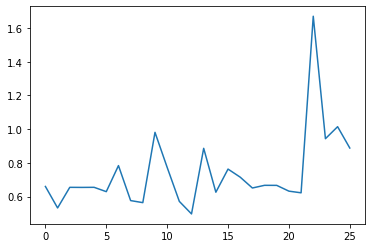

In [17]:
plt.plot(dunn_index_value)  #  to plot dunn index value vs cluster.